In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


120   30
96.66666666666667 %
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
///////////////////////////



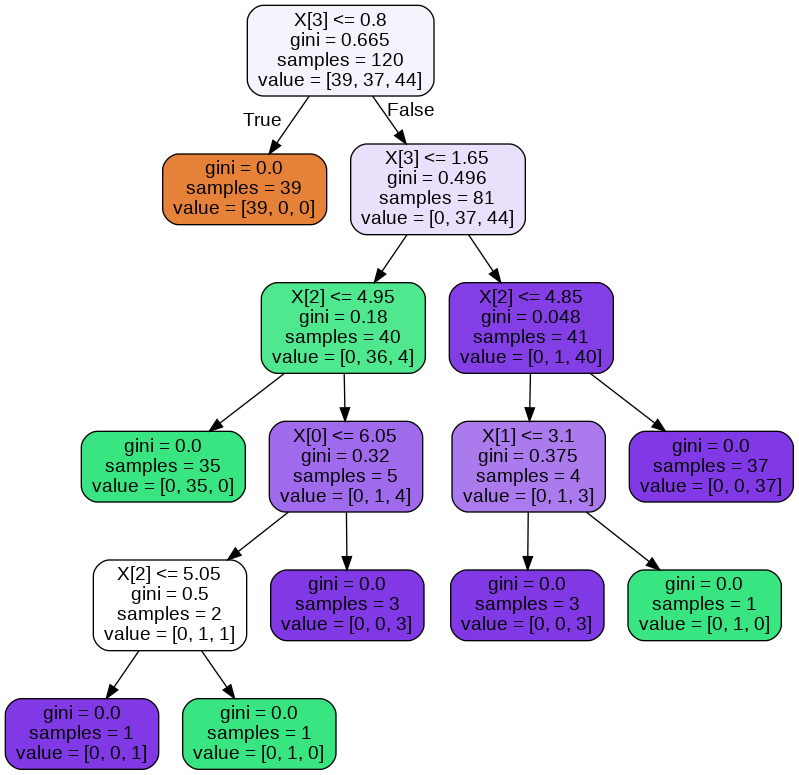

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


# decision tree

iris = pd.read_csv('/content/drive/MyDrive/Github/AI_DS/DS_data/IrisData.csv')


count = iris['Species'].value_counts()
# print(count)
# iris.head(10)


col = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']


# แยก X กับ Y เพื่อใช้ในการเทรน
x = iris[col]
y = iris['Species']
# print(x)
# print(y)

# train > test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

# train => create decision tree
# test => ประเมินประสิทธิภาพ
print(len(x_train),' ',len(x_test))

# Training
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train,y_train)


# vv model => decision tree vv


# test
y_pred = dtree.predict(x_test)

print(metrics.accuracy_score(y_test,y_pred)*100,'%')

# แสดงถึงจุดที่ผิด ผิดไปเป็นคลาสอะไร
confusion = metrics.confusion_matrix(y_test,y_pred)
print(confusion)

print('///////////////////////////\n')
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.core.display import display,HTML,Image
import pydotplus

dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True, rounded=True)
# สร้างกราฟ
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write('g.png')
Image(graph.create_png())
# display(HTML(viz))






